# VQE (Variational Quantum Eigensolver) dla molekuły H<sub>2</subs>

## Cel: znalezienie energii stanu podstawowego dla cząsteczki wodoru

### Energia stanu podstawowego: Przypomnienie
Energią stanu podstawowego nazywamy najniższą możliwą energię, którą może przyjąć określony układ fizyczny. Oznaczana jako $E_{0}$, może zostać wyznaczona np. z równania własnego Hamiltonianu definiowanego jako: $ \hat{H}\Psi_{0}= E_{0}\Psi_{0}$ - wówczas dla stanu podstawowego $\Psi_{0}$ energia ta będzie najmniejszą wartością własną operatora hamiltonianu $\hat{H}$ (zatem w celu policzenia takiej energii wyznaczamy wartości własne operatora - najmniejsza z nich będzie odpowiadała energii podstawowej, a odpowiadający jej wektor będzie opisywać stan podstawowy).

### Dlaczego używamy metody wariancyjnej?
Pojedynczy atom wodoru (proton + elektron) można łatwo opisać. Jego energia w stanie podstawowym lub kolejnych stanach wzbudzonych wyraża się znanym wzorem:
$$ E_{n} = -\frac{13.6 eV}{n^2}$$ gdzie $$ n = 1, 2, 3,...$$

Niestety, cząstki wieloatomowe nie dają się opisywać w ten prosty, analityczny sposób. Z pomocą przychodzi nam zatem metoda wariancyjna.

### Metoda wariancyjna ###
Metoda wariancyjna zaliczana jest do metod przybliżonych - jej zastosowanie daje nam w rezultacie aproksymację prawdziwego wyniku. W celu jej zobrazowania, zacznijmy od nierówności:
$$
E[\psi] \equiv \frac{\langle \psi | H | \psi \rangle}{\langle \psi | \psi \rangle} \geq E_{0}
$$,
gdzie $ E[\psi] $ oznacza wartość oczekiwaną energii w stanie $ |\psi\rangle $. Nierówność tę rozumiemy w następujący sposób: wartość oczekiwana nie może być mniejsza od najmniejszej z dozwolonych energii stanów. Równoznacznie, możemy zapisać: 
$$
E[\psi] =   \frac{\sum E_{n}|\langle E_{n}|\psi \rangle|^{2}}{ \sum |\langle E_{n}|\psi\rangle|^{2}} \geq \frac{E_0 \sum |\langle E_{n}|\psi \rangle|^{2}}{\sum |\langle E_{n}|\psi \rangle|^{2}} = E_{0}
$$
Teoretycznie zatem, w celu wyznaczenia energii stanu podstawowego można brać po kolei każdy stan i zapisywać odpowiadającą mu wartość oczekiwaną $ E[\psi]$, końcowo znajdując najmniejszą spośród tych wartości i przyjmując ją za energię podstawową. Ze względów praktycznych rozważa się jednak tylko pewne wektory, które możemy pisać pewnym zbiorem parametryzowanych zmiennych. Wówczas $ E[\psi]$ staje się funkcją tych paramtetrów $(\alpha, \beta, \gamma,...)$, których wartości wyznaczamy dla wartości minimalnych $E[\psi]$. Znalazłszy takie minimalizujące parametry, otrzymujemy górną granicę $E_{0}$ wyliczając $E(\alpha_{0},\beta_{0},...)$.

#### Przykład: ####
Niech cząstka znajduje się w polu o potencjale:
$$ 
    V(x) = \lambda x^{4}
$$
Znajdźmy energię stanu podstawego $E_{0}$. <br><br> 
Aby móc iteracyjnie wyznaczać kolejne wartości energii stanu podstawowego, musimy znaleźć jakiś punkt wyjścia. Pomyślmy zatem o stanie podstawowym - jakie powinny być jego cechy?
- Funkcja falowa powinna być parzysta (brak węzłów)
- Funkcja falowa powinna mieć maksimum w punkcie \(x=0\), aby zminimalizować $\langle V \rangle$
- Funkcja falowa powinna dążyć do $0$ dla $|x| \to \infty$

<br>Funkcją spełniającą powyższe warunki jest np.:
$$
\psi(x,\alpha) = e^{-\alpha x^{2}/2}
$$

<br>Wyraźmy zatem energię jako funkcję $ \alpha $:

$$
    E(\alpha) = \frac{\langle \psi|\hat{H}|\psi \rangle}{\langle \psi |\psi \rangle } = \frac{\int^{\infty}_{-\infty}\psi^{*}\hat{H}\psi dx}{\int^{\infty}_{-\infty}|\psi|^{2}}
$$

Wiedząc, że:
$$
\hat{H} = -\frac{\hbar^{2}}{2m}\frac{d^{2}}{dx^{2}} + V(x)
$$

Otrzymujemy końcowo minimum dla 

$$
\alpha_{0} = \left( \frac{6 m \lambda}{\hbar^2} \right)^{\frac{1}{3}}
$$

A odpowiadająca tej wartości energia to
$$
E(\alpha_{0}) = \frac{3}{8} \left( \frac{6 \hbar^4 \lambda}{m^2} \right)^\frac{1}{3}
$$

Energia obliczona dla $\alpha_{0}$ przybliża zatem prawdziwą wartość energii stanu podstawowego.
<br> <br>
Niestety nie wiemy, jak bardzo bliskie są $E_0$ i $E(\alpha_{0})$. Jakość naszego przybliżenia możemy ocenić, starając się zmniejszyć wartość naszego górnego przybliżenia poprzez próbowanie nowych funkcji, posiadających coraz to więcej parametrów:
- jeśli granica górna zmniejsza się $\to$ idziemy w dobrą stronę
- jeśli natomiast znacząco nie pomniejszamy jej wartości, dobierając nowe parametry funkcji falowej $\to$ jesteśmy blisko celu

### Przejście do VQE, czyli uruchamiamy komputer kwantowy (pozostawiając klasyczny również włączony) ###
Algorytm VQE to algorytm hybrydowy - część operacji wykonywana jest na kwantowym sprzęcie, a część na jego klasycznym odpowiedniku. Wyróżnić możemy 4 kluczowe jego elementy:
- Operator (najczęściej Hamiltonian) - opisuje on układ, którego własność (w tym przypadku energię stanu podstawowego) chcemy zoptymalizować. Staramy się znaleźć jego wektor własny, który odpowiada jego najmniejszej wartości własnej
- Ansatz - wyjściowy obwód kwantowy przygotowujący stan, który przybliża poszukiwany wektor własny
- Estymator - jest to wartość oczekiwana Hamiltonianu; funkcja kosztu
- Optymalizator (klasyczny) - jego zadaniem jest redukcja ww. funkcji kosztu 

![schemat](vqe.png "Schemat wymiany informacji")

Powyższy obrazek ilustruje współpracę między komputerem klasycznym a kwantowym w trakcie uruchomienia VQE. Zadaniem pierwszego z nich jest optymalizowanie parametrów układu, kwantowa część odpowiada natomiast za przygotowywanie stanów oraz pomiar wartości oczekiwanej Hamiltonianu.

### 1. Konstrukcja hamiltonianu dla $H_2$ ###
Pełny hamiltonian elektronowy molekuły przybiera następującą postać:
$$ H = \sum_{pq}h_{pq}a^{\dagger}_{p}a_{q} + \frac{1}{2}\sum_{pqrs}h_{pqrs}a^{\dagger}_{p}a^{\dagger}_{a}a_{r}a_{s}$$
Posiada on dwie częsci, które są później sumowane:
- jednociałowa część $\sum_{pq}h_{pq}a^{\dagger}_{p}a_{q}$ to połączenie energii kinetycznej elektronów oraz ich interakcji z jądrem
- dwuciałowa część $ \frac{1}{2}\sum_{pqrs}h_{pqrs}a^{\dagger}_{p}a^{\dagger}_{a}a_{r}a_{s} $ odpowiada interakcję elektronów między sobą

#### a. Tworzymy układy dwuatomowe w różnych odległościach ####

In [4]:
import numpy as np
from pyscf import ao2mo, gto, mcscf, scf

distances = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0] # odległości pomiędzy atomami wodoru w każdej z par
mids = [d / 2 for d in distances] # wyśrodkowywanie każdej cząstki w układzie współrzędnych

molecules = []

for mid in mids:
    mol = gto.Mole() # tworzymy obiekt molekuły wodoru; wybieramy orbitalne funkcje bazowe Gaussa 
    mol.build(
    verbose=0,
    atom=[
        ["H", (0, 0, -mid)], # definiujemy dwa atomy wodoru ("H") oraz ich pozycje w przestrzeni 3D
        ["H", (0, 0, mid)],
    ],
    basis="sto-6g", # baza funkcji dla konstrukcji orbitali
    spin=0, # całkowity spiny pary
    charge=0, # ładunek molekuły
    symmetry="Dooh", # symetria punktowa cząsteczki; tutaj symetria D∞h
    )
    molecules.append(mol)

print(molecules)

[<pyscf.gto.mole.Mole object at 0x7167dd005310>, <pyscf.gto.mole.Mole object at 0x7167dca27ed0>, <pyscf.gto.mole.Mole object at 0x7167dca27890>, <pyscf.gto.mole.Mole object at 0x7167dca27610>, <pyscf.gto.mole.Mole object at 0x7167dca27d90>, <pyscf.gto.mole.Mole object at 0x7167dca27b10>]


#### b. budujemy Hamiltonian ####
Zanim przejdziemy do pythonowej implementacji, wyjaśnijmy pokrótce czym są metody Hartree-Focka oraz Full Configuration Interaction. 
- Pierwsza z wymienionych to przybliżona, iteracyjna metoda służąca do rozwiązywania zależnego od czasu równania Schroedingera dla wielociałowych układów elektronowych. Podejście Hartree-Focka rozbija wieloelektronową funkcję falową w zbiór jednoelektronowych funkcji falowych, zwanych orbitalami molekularnymi. Niestety, dokładność tej metody jest niewystarczająca - nie uwzględnia korelacji między elektronami, przez co nie jest współcześnie często używana, jej zaletą jest jednak niski koszt obliczeniowy.
- Druga metoda, Full Configuration Interaction, niejako dopełnia swoją konkurentkę. Bierze pod uwagę oddziaływania między elektronami - dokładna funkcja falowa zależy przecież od kilku elektronów na raz. Ceną tej dokładności jest jednak większy koszt obliczeniowy.

WAŻNE: W poniższym kodzie używany jest Complete Active Space Configuration Interaction (CASCI), w rozważanym jednak przypadku sprowadza się on do FCI.

In [ ]:
mfs = [scf.RHF(mol) for mol in molecules] # tworzymy listę solverów Restricted Hartree Fock dla każdej z molekuł
E1 = [mf.kernel() for mf in mfs] # zbieramy wartości energii policzone dla wszystkich molekuł
mxs = [mcscf.CASCI(mf, ncas=2, nelecas=(1, 1)) for mf in mfs] # tworzymy listę solverów FCI
active_space = range(mol.nelectron // 2 - 1, mol.nelectron // 2 + 1) # wybór aktywnych orbitali; oba orbitale w H_2
mos =  [mx.sort_mo(active_space, base=0) for mx in mxs]  # wybór orbitali do obliczeń - wybieramy wszystkie orbitale, zatem CASCI=FCI
E2 = [mx.kernel(mo)[0] for mx, mo in zip(mxs, mos)]# zbieramy wartości energii, tym razem dla FCI

h1es_ecores = [mx.get_h1eff() for mx in mxs] 
h1es = [h1 for h1, _ in h1es_ecores] #  jednociałowy człon hamiltonianu
ecores= [ec for _, ec in h1es_ecores]

h2es = [ao2mo.restore(1, mx.get_h2eff(), mx.ncas) for mx in mxs] # dwuciałowy człon hamiltonianu

[np.float64(-1.0531879386745635), np.float64(-1.0735829307863605), np.float64(-0.9189359579144252), np.float64(-0.7929527905437734), np.float64(-0.712118653812053), np.float64(-0.6656565075909676)]
[np.float64(-1.065385172771476), np.float64(-1.1088730601684391), np.float64(-1.006562873592196), np.float64(-0.9576583588053154), np.float64(-0.9449905903101945), np.float64(-0.9425614314442265)]


Otrzymane powyżej hamiltoniany (h1e, h2e) są operatorami fermionowymi. W celu wykonywania obliczeń na komputerze kwantowym, konieczne jest jednak ich przełożenie na operatory kubitowe. W tym celu można wykonać następujące mapowania:
- Jordana - Wignera: obsadzenie orbitalu jest kodowane jako stan kubitu
- Parity: informacja o parzystości jest lokalnie kodowana na jednym kubicie, zaś informacja o obsadzeniu rozpościera się na na wszystkie kubity
- Bravyi - Kitaeva: połączenie wyżej wymienionych

W dalszych obliczeniach zostanie użyte mapowanie Jordana - Wignera


In [6]:
from qiskit.quantum_info import SparsePauliOp

def cholesky(V, eps): # rozkład Choleskiego
    no = V.shape[0]
    chmax, ng = 20 * no, 0
    W = V.reshape(no**2, no**2)
    L = np.zeros((no**2, chmax))
    Dmax = np.diagonal(W).copy()
    nu_max = np.argmax(Dmax)
    vmax = Dmax[nu_max]
    while vmax > eps:
        L[:, ng] = W[:, nu_max]
        if ng > 0:
            L[:, ng] -= np.dot(L[:, 0:ng], (L.T)[0:ng, nu_max])
        L[:, ng] /= np.sqrt(vmax)
        Dmax[: no**2] -= L[: no**2, ng] ** 2
        ng += 1
        nu_max = np.argmax(Dmax)
        vmax = Dmax[nu_max]
    L = L[:, :ng].reshape((no, no, ng))
    return L, ng

def identity(n):
    return SparsePauliOp.from_list([("I" * n, 1)])
 
 
def creators_destructors(n, mapping="jordan_wigner"):
    c_list = []
    if mapping == "jordan_wigner":
        for p in range(n):
            if p == 0:
                ell, r = "I" * (n - 1), ""
            elif p == n - 1:
                ell, r = "", "Z" * (n - 1)
            else:
                ell, r = "I" * (n - p - 1), "Z" * p
            cp = SparsePauliOp.from_list([(ell + "X" + r, 0.5), (ell + "Y" + r, -0.5j)])
            c_list.append(cp)
    else:
        raise ValueError("Unsupported mapping.")
    d_list = [cp.adjoint() for cp in c_list]
    return c_list, d_list



def build_hamiltonian(ecore: float, h1e: np.ndarray, h2e: np.ndarray) -> SparsePauliOp:
    ncas, _ = h1e.shape
 
    C, D = creators_destructors(2 * ncas, mapping="jordan_wigner") # wykonujemy mapowanie
    Exc = []
    for p in range(ncas):
        Excp = [C[p] @ D[p] + C[ncas + p] @ D[ncas + p]]
        for r in range(p + 1, ncas):
            Excp.append(
                C[p] @ D[r]
                + C[ncas + p] @ D[ncas + r]
                + C[r] @ D[p]
                + C[ncas + r] @ D[ncas + p]
            )
        Exc.append(Excp)
 
    Lop, ng = cholesky(h2e, 1e-6) # rozkładamy część dwuciałową hamiltonianu w celu ułatwienia obliczeń
    t1e = h1e - 0.5 * np.einsum("pxxr->pr", h2e)
 
    H = ecore * identity(2 * ncas)
    # Wyznaczanie części jednociałowej
    for p in range(ncas):
        for r in range(p, ncas):
            H += t1e[p, r] * Exc[p][r - p]
    # WYznaczanie części dwuciałowej
    for g in range(ng):
        Lg = 0 * identity(2 * ncas)
        for p in range(ncas):
            for r in range(p, ncas):
                Lg += Lop[p, r, g] * Exc[p][r - p]
        H += 0.5 * Lg @ Lg
 
    return H.chop().simplify()


Hs = [build_hamiltonian(ecore, h1e, h2e) for ecore, h1e, h2e in zip(ecores, h1es, h2es)] # lista hamiltonianów

### 2. Ansatz ###
Kolejny krok stanowi przygotwanie odpowiedniego do problemu ansatzu, czyli stworzenia naszego punktu wyjściowego do dalszej optymalizacji. W celu jego przygotowania zostanie użyty gotowy już obwód - w tym przypadku będzie to Efficient SU2. Składa się on z bramek jednokubitowych oraz CX. Wybrano tutaj ansatz typu Hardware-Efficient (HEA), który w przeciwieństwie do swojego odpowiednika (UCCSD) kładzie nacisk na realizowalność na danym sprzęcie, m.in. zmniejszając głębokość układów. W przeciwieństwie do Unitary Coupled-Cluster Singles and Doubles może on jednak realizować nierealne fizycznie układy. 

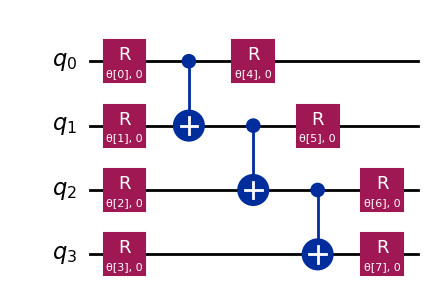

In [7]:
from qiskit.circuit.library import efficient_su2
ansatz = efficient_su2(Hs[0].num_qubits, su2_gates=["rx"], entanglement="linear", reps=1) # tworzymy ansatz składający się z 3 bramek Rx na wejściu i wyjściu oraz ustalamy sposób tworzenia splątań jako "linear" - kolejne linie łączą się ze sobą kaskadowo
x0s = [2 * np.pi * np.random.random(ansatz.num_parameters) for _ in range(len(distances))] # losowe stany początkowe dla naszego ansatzu; kąty do bramek
ansatz.decompose().draw("mpl")

### 3. Funkcja kosztu i optymalizator ###
Do zadań tytułowej funkcji kosztu należy zwracanie wartości oczekiwanej hamiltonianu. Można ją optymalizować przy pomocy SPSA, COBYLA albo SLSQP.

In [8]:
def cost_func(params, ansatz, H, estimator): # argumenty: params - losowe wartości x0, estimator - obiekt liczący wartość oczekiwaną Hamiltonianu
    pub = (ansatz, [H], [params])
    result = estimator.run(pubs=[pub]).result()
    energy = result[0].data.evs[0]
    return energy
 


W celu lepszej symulacji wyników używana będzie symulacja prawdziwego backendu. Także estymator przybliżający obecną wartość oczekiwaną Hamiltonianu będzie bazował na tym backendzie. 

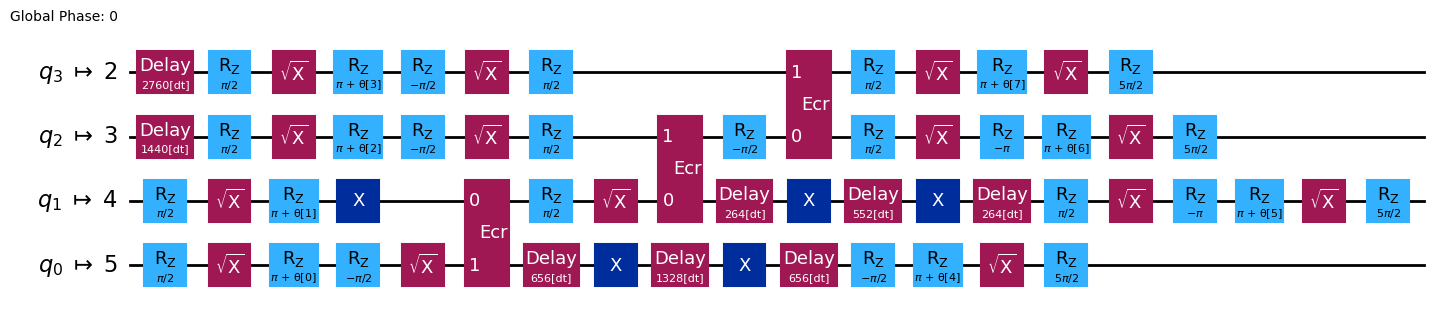

In [9]:
from qiskit_aer import AerSimulator
from qiskit.primitives import BackendEstimatorV2
from qiskit_ibm_runtime.fake_provider import FakeKyoto

fake_backend = FakeKyoto()
backend = AerSimulator.from_backend(fake_backend)

estimator = BackendEstimatorV2(backend=backend)

from qiskit.transpiler import PassManager
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler.passes import (
    ALAPScheduleAnalysis,
    PadDynamicalDecoupling,
    ConstrainedReschedule,
)
from qiskit.circuit.library import XGate
 
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
pm.scheduling = PassManager(  # określamy parametry procesu transpilacji
    [
        ALAPScheduleAnalysis(target=target),
        ConstrainedReschedule(
            acquire_alignment=target.acquire_alignment,
            pulse_alignment=target.pulse_alignment,
            target=target,
        ),
        PadDynamicalDecoupling(
            target=target,
            dd_sequence=[XGate(), XGate()],
            pulse_alignment=target.pulse_alignment,
        ),
    ]
)
 
 
ansatz_isa = pm.run(ansatz) # transpilujemy przygotowany wcześniej ansatz na konkretny sprzęt
ansatz_isa.draw(output="mpl", idle_wires=False, style="iqp")

In [10]:
hamiltonian_isas = [H.apply_layout(ansatz_isa.layout) for H in Hs] # oraz dostosowujemy Hamiltoniany pod nowy obwód


### 4. Uruchomienie procedury VQE ###
Mając już gotowy ansatz, parametry początkowe, funkcję kosztu, optymalizator oraz estymator możemy przejść do sedna - czyli uruchomić algorytm VQE. Wystartuje on dla każdej cząstki osobno z maksymalną liczbą iteracji ustaloną na 150.

In [ ]:
from scipy.optimize import minimize

backend_sim = AerSimulator.from_backend(backend)
estimator = BackendEstimatorV2(backend=backend_sim)

ress_real = []
energy_evolutions_real = []

for x0, hamiltonian_isa in zip(x0s, hamiltonian_isas):
    energy_evolution = []
    res = minimize(
        cost_func,
        x0,
        args=(ansatz_isa, hamiltonian_isa, estimator),
        method="COBYLA",
        options={"maxiter": 150},
        callback=lambda xk: energy_evolution.append(cost_func(xk, ansatz_isa, hamiltonian_isa, estimator))
    )


    energy_evolutions_real.append(energy_evolution)
    ress_real.append(res)



### Analiza ###
1. Zestawienie VQE COBYLA (dla maksymalnie 150 iteracji) z FCI oraz Hartee-Fock <br>


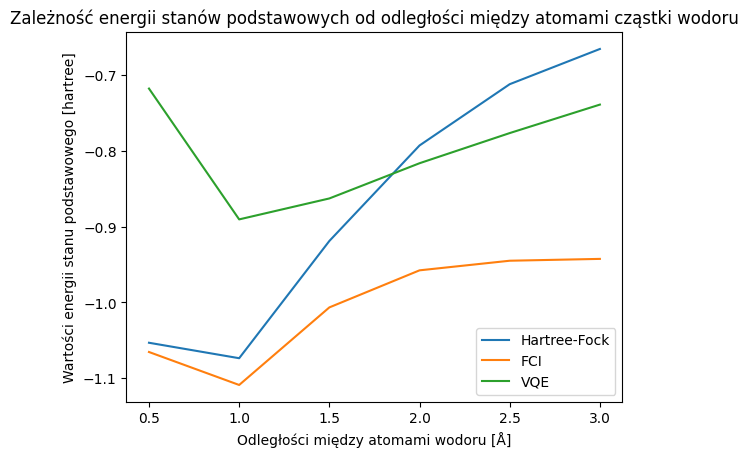

In [55]:
import matplotlib.pyplot as plt

nuclear_energies = [mf.energy_nuc() for mf in mfs]

plt.plot(distances, E1, label="Hartree-Fock")
plt.plot(distances, E2, label="FCI")
plt.plot(distances, [getattr(res, "fun") - ne for res, ne in zip(ress_real, nuclear_energies)], label="VQE")
plt.xlabel("Odległości między atomami wodoru [Å]")
plt.ylabel("Wartości energii stanu podstawowego [hartree]")
plt.title("Zależność energii stanów podstawowych od odległości między atomami cząstki wodoru")
plt.legend()
plt.show()


2. Porównanie zmian energii na przestrzeni iteracji dla wszystkich odległości międzyatomowych.<br>
Spośród wszystkich odgległości, największe wahania wartości zawuażalne są dla $0.5 Å$

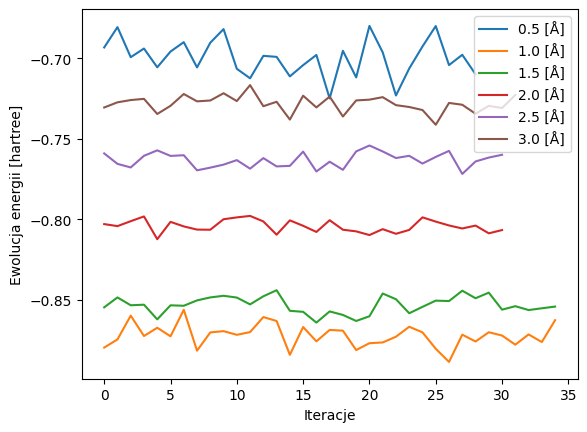

In [57]:

for i in range(len(energy_evolutions_real)):
    its = [i for i in range(len(energy_evolutions_real[i]))]
    energies = [e - nuclear_energies[i] for e in energy_evolutions_real[i]]
    plt.plot(its, energies, label=f"{distances[i]} [Å]")
    plt.xlabel("Iteracje")
    plt.ylabel("Ewolucja energii [hartree]")
plt.legend()
plt.show()

3. Porównanie dwóch optymalizatorów <br>
W wykonanej tutaj implementacji VQE optymalizatory COBYLA oraz SLSQP zarysowały krzywe o identycznych kształtach. Różnicą między nimi jest lekkie wertykalne przesunięcie tej dotyczącej SQLSP, który to optymalizator potrzebował więcej czasu na wykonanie pracy, nawet dla mniejszej liczby iteracji od swojej konkurencji (10 vs. do 35).

In [ ]:
ress_real_slsqp = []

for x0, hamiltonian_isa in zip(x0s, hamiltonian_isas):
    energy_evolution = []
    res = minimize(
        cost_func,
        x0,
        args=(ansatz_isa, hamiltonian_isa, estimator),
        method="SLSQP",
        options={"maxiter": 10, "ftol": 1e-3},
    )

    ress_real_slsqp.append(res)

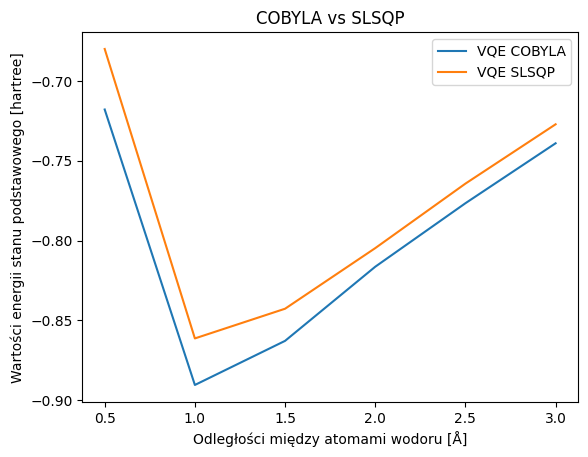

In [ ]:
plt.plot(distances, [getattr(res, "fun") - ne for res, ne in zip(ress_real, nuclear_energies)], label="VQE COBYLA")
plt.plot(distances, [getattr(res, "fun") - ne for res, ne in zip(ress_real_slsqp, nuclear_energies)], label="VQE SLSQP")

plt.xlabel("Odległości między atomami wodoru [Å]")
plt.ylabel("Wartości energii stanu podstawowego [hartree]")
plt.title("COBYLA vs SLSQP")
plt.legend()
plt.show()

### Podsumowanie ###
Metoda VQE w przygotowanej tutaj implementacji daje zbliżone wyniki. Jednym z czynników tutaj jest dobranie optymalizatora - COBYLA oferuje najszybsze rezultaty. Zauważalne są jednak różnice w kształtach krzywych otrzymanych przez VQE względem tych klasycznych. Oprócz samego doboru sposobu optymalizacji, kluczowa jest także liczba iteracji oraz dokładność, a także stworzenie odpowiedniego ansatzu jak i samego estymatora.

Żródła: <br>
R. Shankar, *Mechanika kwantowa*. Warszawa: Wydawnictwo Naukowe PWN, 2006. <br>
https://quantum.cloud.ibm.com/learning/en/courses/quantum-diagonalization-algorithms/vqe <br>
https://quantum.cloud.ibm.com/learning/en/courses/quantum-chem-with-vqe <br>
https://qiskit-community.github.io/qiskit-nature/tutorials/03_ground_state_solvers.html <br>
https://insilicosci.com/hartree-fock-method-a-simple-explanation/ <br>
https://nucleartalent.github.io/ManyBody2018/doc/pub/fci/html/fci-bs.html <br>
https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Book%3A_Quantum_States_of_Atoms_and_Molecules_(Zielinksi_et_al)/09%3A_The_Electronic_States_of_the_Multielectron_Atoms/9.08%3A_Configuration_Interaction